# Introduction
In this notebook, I will be using graphs to visualize the realtionship between the variables in a "Student Performance In Exams" dataset

## The dataset includes the following columns:

#### * Gender (object) - The gender of the participant
- female
- male
#### * Race/Ethnicity (object) - The race or ethnicity of the participant
- Group A
- Group B
- Group C
- Group D
- Group E
#### * Parental level of education (object) - The parental level of education of the participant
- bachelor's degree
- some college
- master's degree
- associate's degree
- high school some high school
- Lunch (object) - Whether the participant is:
- standard
- free/ reduced
#### * Test preparation course (object) - Whether the participant took the test preparation course or not
- none
- completed
#### * Math score (int64) - The participants math score
#### *  Reading score (int64) - The participants reading score
#### * Writing score (int64) - The participants writing score
#### * Note: This is a fictional data which means it is not a real world data but a artificial data 

### Exploring the data

*Lets start by importing necessary libraries*

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
sns.set()
sns.set_palette('Set1')

In [69]:
df = pd.read_csv(r"C:\Users\91969\Desktop\StudentsPerformance.csv")

In [70]:
df.head(15)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Scores Correlations
*Let us check the correlation between our numerical variables which are math, reading and writing scores*

df_corr = df.corr() to remove the error of 2-D parameter

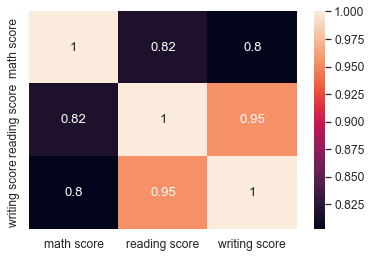

In [72]:
df_corr = df.corr()
sns. set(font_scale=1.1) 
sns.heatmap(df_corr,annot = True)

*With this correlation heatmap, its easy to tell that reading and writing scores are very correlated with each other while math scores also correlate with the other scores but not as high as reading and writing scores correlation*

*By using scatter plots, we can better visualize the correlation between the 3 numeric variables.*

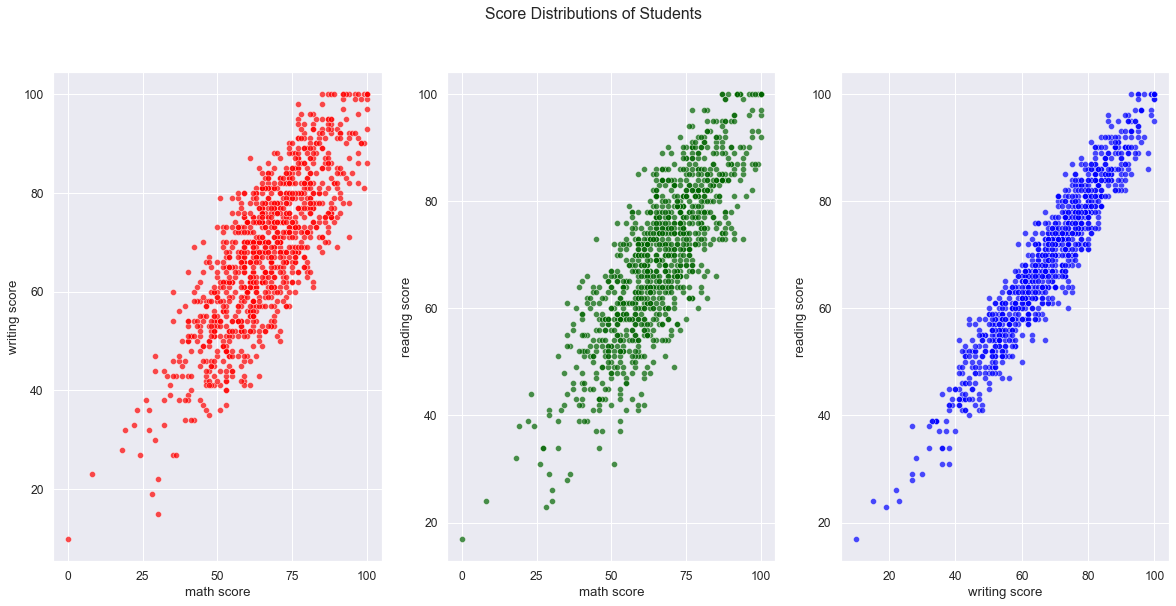

In [73]:
fig , ax = plt.subplots(ncols = 3 , figsize = (20,9))
fig.suptitle('Score Distributions of Students')
sns. set(font_scale=1.8) 

sns.scatterplot(data=  df , x = 'math score' , y = 'writing score' , ax = ax[0], alpha = 0.7 , color = 'red')
sns.scatterplot(data=df, x='math score', y='reading score', ax=ax[1], alpha=0.7 , color = 'darkgreen')
sns.scatterplot(data=df, x='writing score', y='reading score', ax=ax[2], alpha=0.7 ,color = 'blue')

*The graph shows that the variables have positive correlation, though reading and writing scores plots are closer to each other than the other graphs that includes the math score*

*Test Preparation Course
Lets add another variable to gain more insight, in this case we'll add "test preparation course" which refers to whether the student took a test preparation course.*

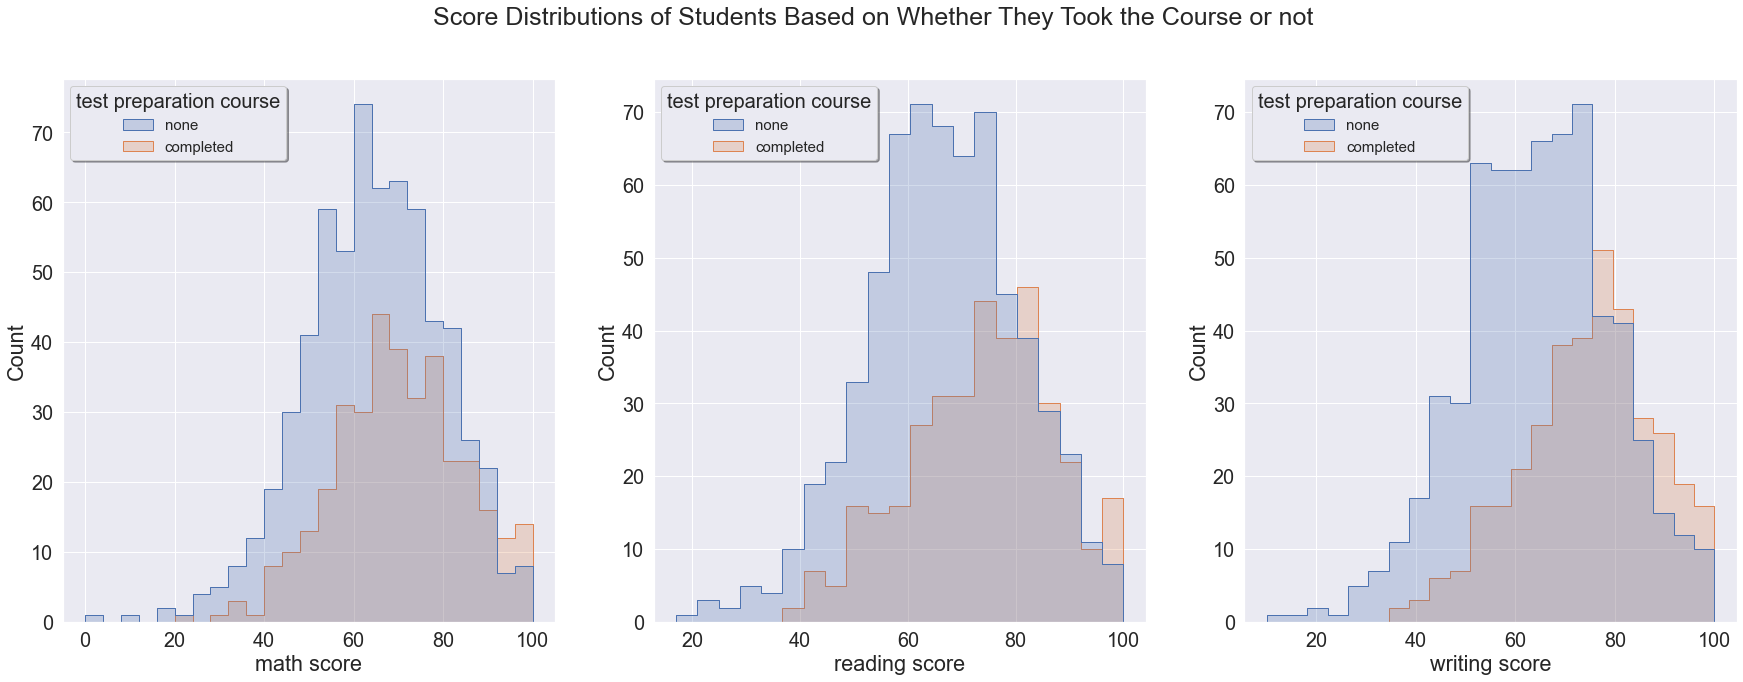

In [74]:
fig , ax = plt.subplots(ncols = 3 , figsize = (30,10))

fig.suptitle('Score Distributions of Students Based on Whether They Took the Course or not' , fontsize = 25)
sns. set(font_scale=1.8) 

a =sns.histplot(df, x = 'math score' , ax=ax[0], hue = 'test preparation course',element = 'step')
b =sns.histplot(df, x='reading score', ax=ax[1], hue='test preparation course', element='step' )
c =sns.histplot(df, x='writing score', ax=ax[2], hue='test preparation course', element='step' )

sns.move_legend(a,"upper left" , bbox_to_anchor= (0,1) ,fontsize = 15 , title_fontsize='20' ,shadow = '10')
sns.move_legend(b, "upper left", bbox_to_anchor=(0,1), fontsize = 15 , title_fontsize='20',shadow = '10')
sns.move_legend(c, "upper left", bbox_to_anchor=(0,1), fontsize = 15, title_fontsize='20',shadow = '10')

*By looking at the histograms we have created, the students who took the course (orange) has a slight shift to the right compared to the students who didnt took the course (green). The green colored distribution overlapped on the orange colored distribution on the lower score parts and the orange colored distribution then overlapped on the green colored distribution on the higher score parts which means that if the student took the course, they're most likely will get a higher score than those students who didn't.*

*Though, there are also a lot of students who didn't took the course had a more than average scores and some even aced the tests. Well, to find out if our hypothesis is correct, we have to visualize more data.*

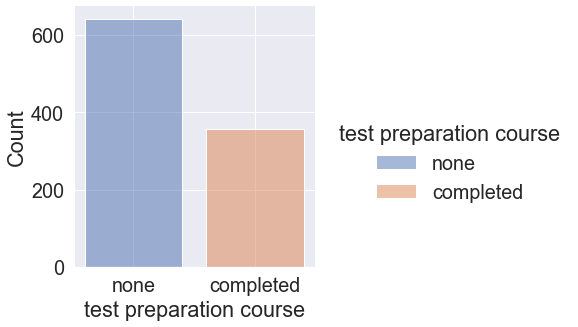

In [75]:
sns.displot(df, x='test preparation course', hue='test preparation course' ,shrink=0.8 )

*There it is! because the none category has almost double the reponses than the completed category, its the reason why we saw that the green colored distribution earlier had taller distribution than the orange one.*

### Gender
*The next variable we'll be comparing is gender and see if test scores and gender have a relationship*

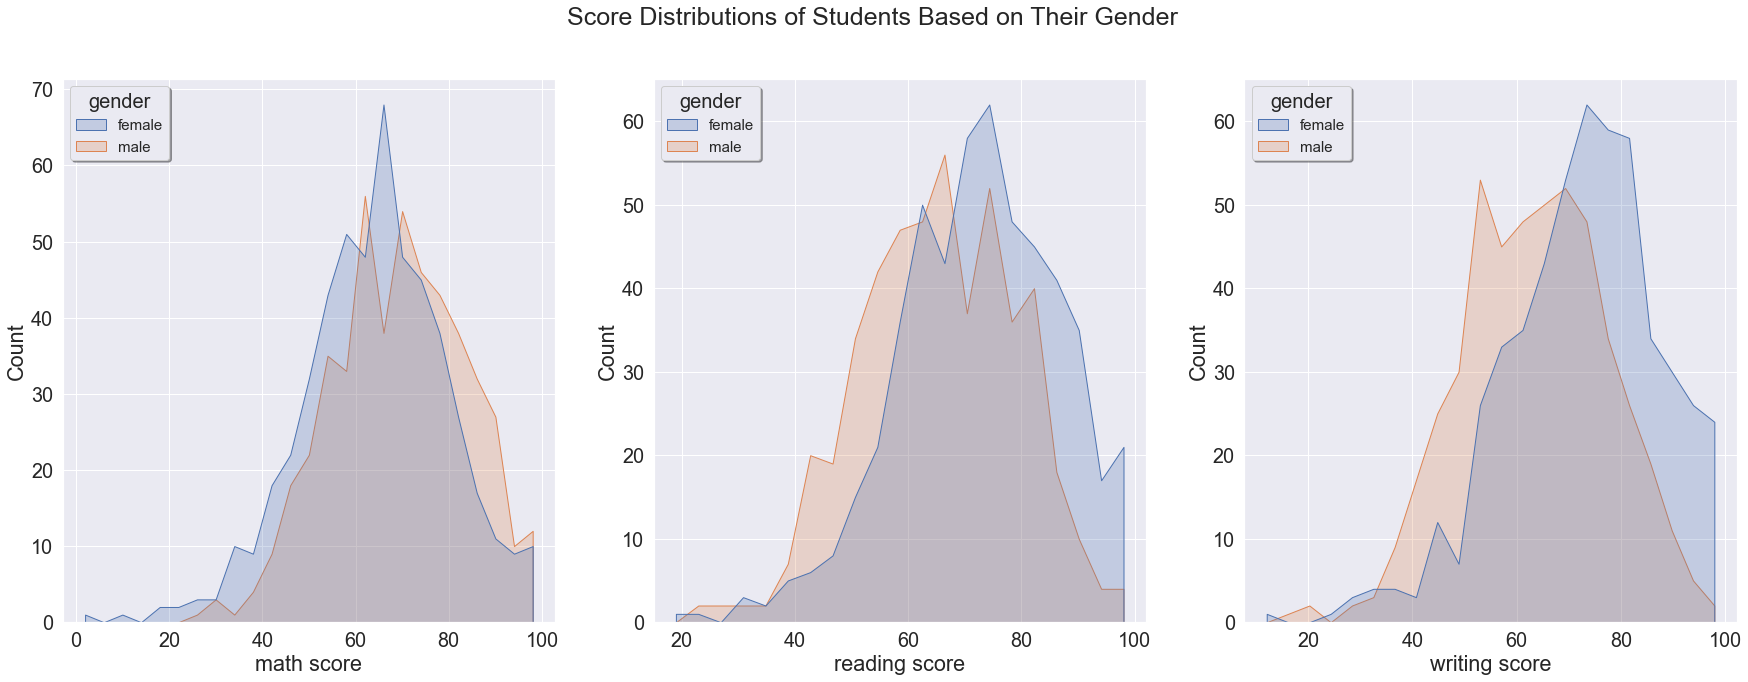

In [76]:
fig, ax = plt.subplots(ncols=3, figsize=(30,10))

fig.suptitle('Score Distributions of Students Based on Their Gender' , fontsize = 25)
sns. set(font_scale=1.8) 

a= sns.histplot(df, x='math score', ax=ax[0], hue='gender', element='poly')
b= sns.histplot(df, x='reading score', ax=ax[1], hue='gender', element='poly')
c= sns.histplot(df, x='writing score', ax=ax[2], hue='gender', element='poly')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1), fontsize = 15 , title_fontsize='20' ,shadow = '10')
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1),fontsize = 15 , title_fontsize='20' ,shadow = '10')
sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1),fontsize = 15 , title_fontsize='20' ,shadow = '10')

*Interesting! Based on what we can observe in this data, male students who took the math tests got slightly higher scores than female students, though female students who took the reading and writing scores got slightly higher scores than male students.*

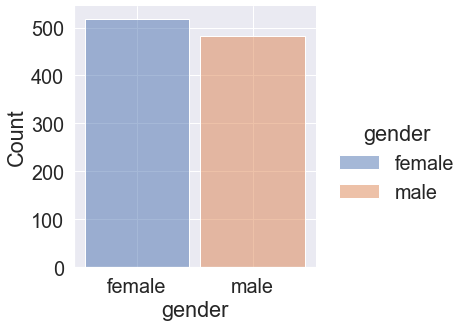

In [77]:
sns.displot(df, x='gender', hue='gender', shrink=0.9)

*So I also checked the distribution based on the students gender and the distribution seems to be almost the same.*

### Race/ Ethnicity

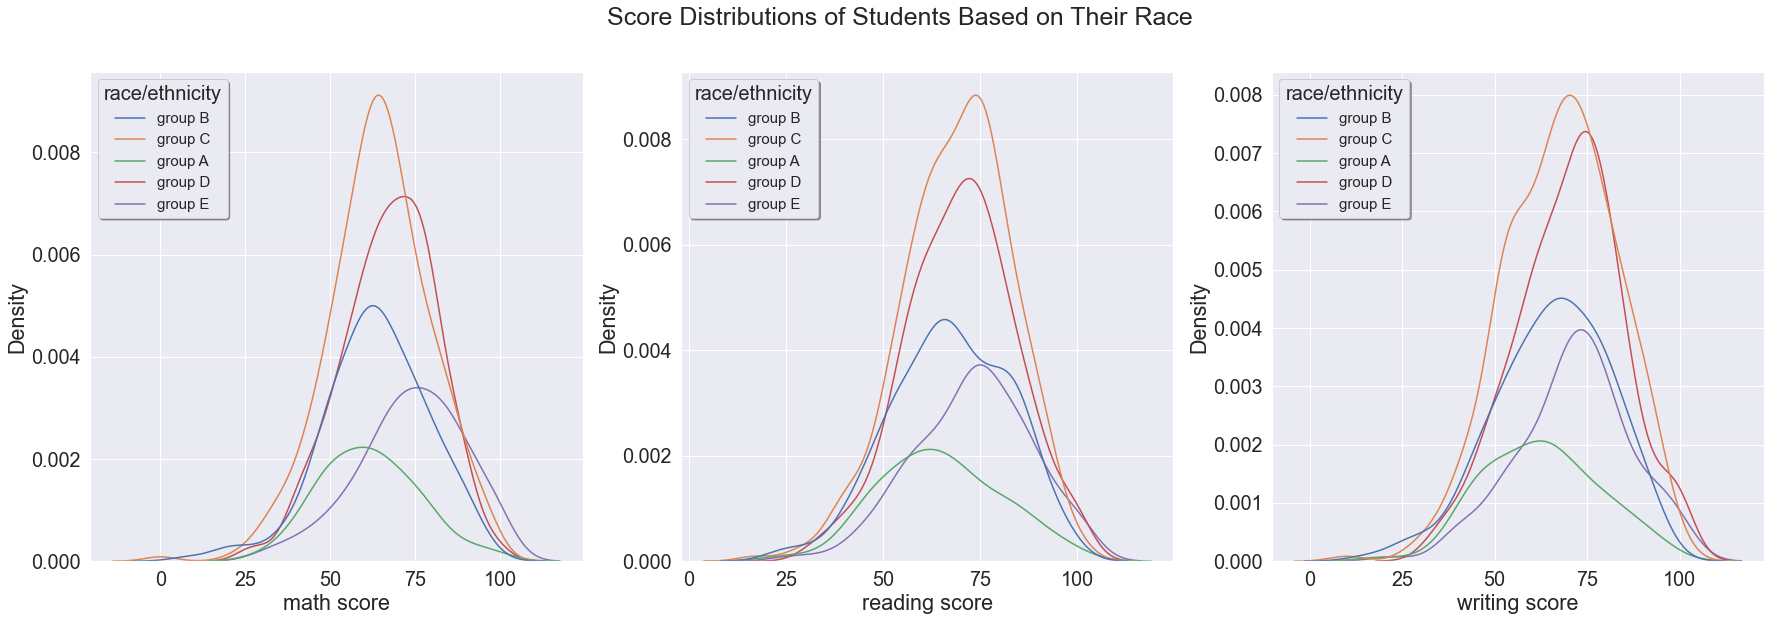

In [78]:
fig, ax = plt.subplots(ncols=3, figsize=(30,9))

fig.suptitle('Score Distributions of Students Based on Their Race' ,fontsize = 25)
sns. set(font_scale=2.4) 
a= sns.kdeplot(data=df, x='math score', ax=ax[0], hue='race/ethnicity')
b= sns.kdeplot(data=df, x='reading score', ax=ax[1], hue='race/ethnicity')
c= sns.kdeplot(data=df, x='writing score', ax=ax[2], hue='race/ethnicity')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1),fontsize = 15 , title_fontsize='20' ,shadow = '10')
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1),fontsize = 15 , title_fontsize='20' ,shadow = '10')
sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1),fontsize = 15 , title_fontsize='20' ,shadow = '10')

*By observing the kde plot above, theres slight shift in between the different groups. Group E had the most right shift compared to the other groups. Therefore, being group E as a race/ethnicity will make you more likely to get higher scores than to those who arent*

### Parental Level of Education

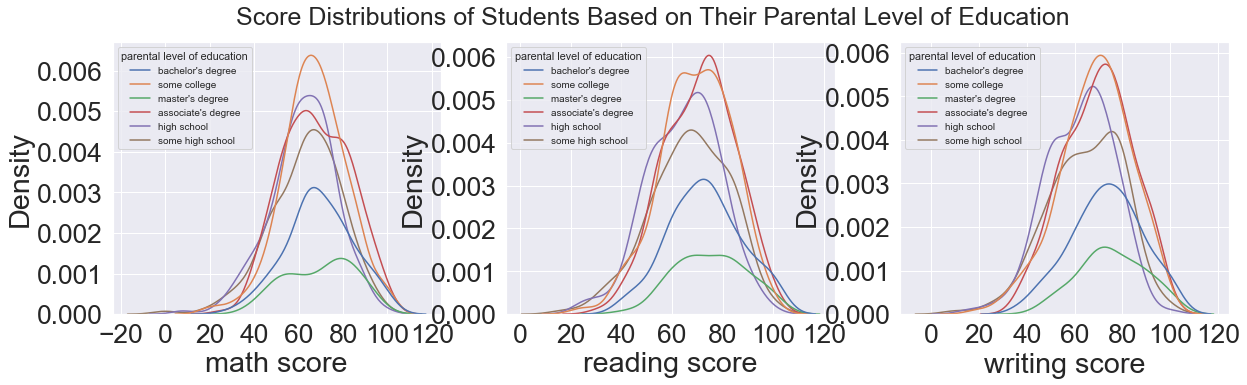

In [79]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

fig.suptitle('Score Distributions of Students Based on Their Parental Level of Education' ,fontsize = '25')
sns. set(font_scale=0.9) 
a= sns.kdeplot(data=df, x='math score', ax=ax[0], hue='parental level of education')
b= sns.kdeplot(data=df, x='reading score', ax=ax[1], hue='parental level of education')
c= sns.kdeplot(data=df, x='writing score', ax=ax[2], hue='parental level of education')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1))

*Based on the graph above, they all seem to be close to each other and it means that parental level of education doesnt have that much of an impact on their test scores*

### Lunch

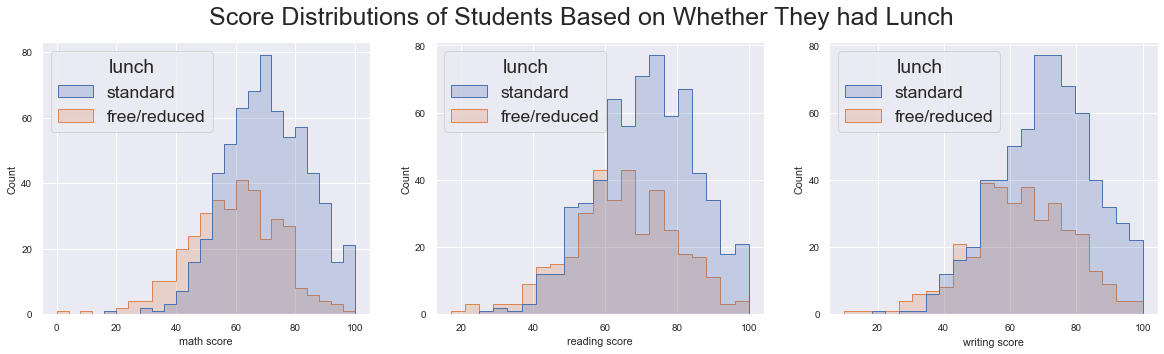

In [80]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

fig.suptitle('Score Distributions of Students Based on Whether They had Lunch' ,fontsize = '25')
sns. set(font_scale=1.6) 
a= sns.histplot(df, x='math score', ax=ax[0], hue='lunch', element='step')
b= sns.histplot(df, x='reading score', ax=ax[1], hue='lunch', element='step')
c= sns.histplot(df, x='writing score', ax=ax[2], hue='lunch', element='step')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1))

*Its pretty obvious that student who are standard at lunch, they got higher score than thosw who didn't*

### Conclusion
*Now we will answer the quentions we have earlier:*

*How effective is the test preparation course?*

*Its very effective because the students who took the course got higher test scores on all the tests unlike to those who didnt took the course*

*Which major factors contribute to test outcomes?*

*The highest factor that contribute to test outcomes is the test preparation course and followed by the lunch and lastly is the gender, though race/ethnicity has quite influence on the test scores, its very little.*

*What would be the best way to improve student scores on each test?*

*To take the test preparation course. Even theres other factors that have a major effect on the test outcomes, its not a choice that students could change, examples: lunch, gender and race/ethnicity*
